***Exploratory Tasks***

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Loading the exploratory dataset (NY arrests data)

In [95]:
arrests_df = pd.read_csv('nypd_arrests_data.csv').drop(columns=['ARREST_KEY', 'PD_CD', 'PD_DESC', 'KY_CD', 'LAW_CODE', 'LAW_CAT_CD', 'ARREST_BORO', 'ARREST_PRECINCT', 'JURISDICTION_CODE', 'X_COORD_CD', 'Y_COORD_CD', 'Latitude', 'Longitude', 'Lon_Lat'])
arrests_df.head()

,ARREST_DATE,OFNS_DESC,AGE_GROUP,PERP_SEX,PERP_RACE
0,1/1/20,SEX CRIMES,25-44,M,WHITE HISPANIC
1,1/1/20,ASSAULT 3 & RELATED OFFENSES,18-24,F,BLACK
2,1/1/20,POSSESSION OF STOLEN PROPERTY,<18,M,BLACK
3,1/1/20,ASSAULT 3 & RELATED OFFENSES,45-64,M,BLACK
4,1/1/20,ASSAULT 3 & RELATED OFFENSES,18-24,M,BLACK


Loading the US-all confirmed cases dataset

In [96]:
confirmed_df = pd.read_csv('US_confirmed.csv')
confirmed_df.head()

,State,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,...,2021-02-23,2021-02-24,2021-02-25,2021-02-26,2021-02-27,2021-02-28,2021-03-01,2021-03-02,2021-03-03,2021-03-04,2021-03-05,2021-03-06,2021-03-07,2021-03-08,2021-03-09,2021-03-10,2021-03-11,2021-03-12,2021-03-13,2021-03-14,2021-03-15,2021-03-16,2021-03-17,2021-03-18,2021-03-19,2021-03-20,2021-03-21,2021-03-22,2021-03-23,2021-03-24,2021-03-25,2021-03-26,2021-03-27,2021-03-28,2021-03-29,2021-03-30,2021-03-31,2021-04-01,2021-04-02,2021-04-03
0,AK,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,55538,55710,55847,55947,55947,55947,56290,56409,56582,56717,56853,56853,56853,57180,57267,57410,57635,57740,57740,57740,58104,58204,58371,58520,58594,58594,58594,58934,59106,59303,59448,59627,59627,59627,59627,60248,60248,60628,60823,60823
1,AL,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,488842,490138,491116,491868,492696,493257,493770,494442,497161,498085,498898,499445,499831,500098,500623,501403,502265,502726,503311,503680,508230,508733,509493,510060,510588,511098,511463,511782,511881,512718,513161,513605,514098,514415,514642,515015,515423,515893,516309,516662
2,AR,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,316612,317410,318135,318646,319203,322511,322594,323010,323399,323791,324351,324677,324843,324974,325404,325719,326055,326513,326825,326954,327073,327467,327793,328055,328281,328555,328667,328719,328952,329178,329515,329700,329865,329934,330013,330188,330401,330611,330756,330972
3,AZ,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,811968,811968,814528,814528,816782,817821,817821,818670,819954,821109,823385,823385,827237,827802,827802,828701,830720,832090,832904,832904,833582,834073,835056,835387,835549,835549,836906,836906,837416,838016,838016,838719,839892,840492,840614,841192,841884,842273,843174,844328
4,CA,0,0,0,0,2,3,3,4,4,4,4,4,6,6,6,6,6,6,6,6,7,7,8,8,8,8,8,9,9,9,12,12,12,13,13,15,16,18,22,...,3450075,3455375,3460338,3465734,3470880,3475564,3509158,3512368,3515499,3518362,3521268,3523381,3525251,3528464,3531204,3533904,3536431,3538799,3540578,3542026,3544665,3546902,3549066,3550931,3552725,3553989,3555092,3557289,3559373,3561678,3563340,3564383,3564476,3564476,3564476,3564476,3564476,3570718,3573028,3577951


Loading the US-all deaths dataset

In [97]:
deaths_df = pd.read_csv('US_deaths.csv')
deaths_df.head()

,State,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,...,2021-02-23,2021-02-24,2021-02-25,2021-02-26,2021-02-27,2021-02-28,2021-03-01,2021-03-02,2021-03-03,2021-03-04,2021-03-05,2021-03-06,2021-03-07,2021-03-08,2021-03-09,2021-03-10,2021-03-11,2021-03-12,2021-03-13,2021-03-14,2021-03-15,2021-03-16,2021-03-17,2021-03-18,2021-03-19,2021-03-20,2021-03-21,2021-03-22,2021-03-23,2021-03-24,2021-03-25,2021-03-26,2021-03-27,2021-03-28,2021-03-29,2021-03-30,2021-03-31,2021-04-01,2021-04-02,2021-04-03
0,AK,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,278,278,278,278,278,278,288,289,289,289,290,290,290,290,290,290,290,291,291,291,291,291,292,295,295,295,295,295,297,297,298,298,298,298,298,298,298,298,298,298
1,AL,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,9663,9747,9835,9875,9934,9934,9936,9995,10033,10095,10125,10152,10152,10152,10189,10225,10279,10305,10333,10333,10335,10343,10368,10397,10429,10441,10441,10441,10456,10491,10511,10527,10530,10530,10530,10532,10558,10558,10611,10640
2,AR,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,5378,5388,5400,5410,5420,5429,5432,5432,5434,5436,5438,5439,5449,5457,5463,5476,5494,5514,5526,5541,5547,5555,5566,5573,5587,5593,5601,5606,5608,5617,5625,5636,5642,5646,5649,5661,5669,5678,5679,5681
3,AZ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,15693,15693,15897,15897,15980,15980,15980,16061,16091,16185,16269,16269,16328,16332,16332,16407,16464,16519,16553,16553,16554,16574,16586,16646,16692,16692,16746,16746,16799,16843,16843,16900,16918,16918,16921,16942,16968,16979,16998,17005
4,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,...,49565,49880,50991,51382,51821,51979,52129,52429,52823,53194,53464,53722,53828,53878,54320,54590,54878,55095,55235,55330,55372,55577,55795,56027,56072,56118,56545,56596,56850,57091,57336,57551,57746,57778,57778,57778,57778,58094,58271,58429


Parsing the confirmed data to get daily number of confirmed cases

In [98]:
def getPerDayData_confirmed(data):
  states=['Confirmed_Count']
  for m_state in states:
    data[m_state]=data[m_state].diff().fillna(data[m_state])
  return data

ny_confirmed_count_df = pd.DataFrame()
ny_confirmed_count_df['Date'] = pd.to_datetime(confirmed_df.columns[1:].to_list())
ny_confirmed_count_df['Confirmed_Count'] = np.array(confirmed_df.iloc[34].iloc[1:])
getPerDayData_confirmed(ny_confirmed_count_df)
len(ny_confirmed_count_df)

438

Parsing the deaths data to get daily number of deaths

In [99]:
def getPerDayData_deaths(data):
  states=['Deaths_Count']
  for m_state in states:
    data[m_state]=data[m_state].diff().fillna(data[m_state])
  return data

ny_deaths_count_df = pd.DataFrame()
ny_deaths_count_df['Date'] = pd.to_datetime(deaths_df.columns[1:].to_list())
ny_deaths_count_df['Deaths_Count'] = np.array(deaths_df.iloc[34].iloc[1:])
getPerDayData_deaths(ny_deaths_count_df)
len(ny_deaths_count_df)

438

Parsing the arrests data to get daily count of all types of 
arrests

In [100]:
arrests_df['ARREST_DATE'] = pd.to_datetime(arrests_df["ARREST_DATE"])
arrests_df.sort_values(by='ARREST_DATE')
counts = arrests_df.groupby('ARREST_DATE')['OFNS_DESC'].count()
arrests_count_df = pd.DataFrame()
arrests_count_df['ARREST_DATE'] = arrests_df['ARREST_DATE'].drop_duplicates()
arrests_count_df['Counts'] = np.array(counts)
len(arrests_count_df)

456

Parsing the arrests data to get daily count of burglary and serious crimes

In [101]:
arrests_burglary_df = arrests_df[arrests_df['OFNS_DESC'].isin(['BURGLARY'])]
arrests_serious_crimes_df = arrests_df[arrests_df['OFNS_DESC'].isin(['MURDER & NON-NEGL. MANSLAUGHTE', 'FELONY ASSAULT', 'KIDNAPPING & RELATED OFFENSES'])]

In [102]:
counts = arrests_burglary_df.groupby('ARREST_DATE')['OFNS_DESC'].count()
arrests_burglary_count_df = pd.DataFrame()
arrests_burglary_count_df['ARREST_DATE'] = arrests_burglary_df['ARREST_DATE'].drop_duplicates()
arrests_burglary_count_df['Counts'] = np.array(counts)
arrests_burglary_count_df.head()

,ARREST_DATE,Counts
19,2020-01-01,14
491,2020-01-02,15
1147,2020-01-03,18
1620,2020-01-04,23
2178,2020-01-05,5


In [103]:
counts = arrests_serious_crimes_df.groupby('ARREST_DATE')['OFNS_DESC'].count()
arrests_serious_crimes_count_df = pd.DataFrame()
arrests_serious_crimes_count_df['ARREST_DATE'] = arrests_serious_crimes_df['ARREST_DATE'].drop_duplicates()
arrests_serious_crimes_count_df['Counts'] = np.array(counts)
arrests_serious_crimes_count_df

,ARREST_DATE,Counts
10,2020-01-01,60
492,2020-01-02,60
1132,2020-01-03,38
1604,2020-01-04,27
2005,2020-01-05,30
...,...,...
177941,2021-03-27,35
178238,2021-03-28,31
178502,2021-03-29,37
178803,2021-03-30,33


These functions below are used to calculate Pearson Coefficients of two datasets. We use these to check if datasets related to our X dataset is independent of datasets in US_all_confirm and US_all_death

In [104]:
def calculate_sample_mean(X):
    return sum(X) / len(X)

In [105]:
p_value = 0.5
def calculate_pearsons_coefficient(X, Y):
    x_mean = calculate_sample_mean(X)
    print("X mean =", x_mean)
    y_mean = calculate_sample_mean(Y)
    print("Y mean =", y_mean)
    numer = sum([(x_i - x_mean) * (y_i - y_mean) for x_i, y_i in zip(X, Y)])
    print("numerator =", numer)
    denom = (sum([(x_i - x_mean)**2 for x_i in X]) * sum([(y_i - y_mean)**2 for y_i in Y])) ** 0.5
    print("denominator =", denom)
    return numer / denom

Lockdown was imposed in NY to reduce the impact of covid. Below are the details

**March 7, 2020**	State of emergency declared.

**May 15, 2020**	Phase 1 of reopening allowed for counties that met qualifications. Five counties met qualifications and began reopening on this date.
**May 15, 2020**	Drive-in theaters, landscaping/gardening businesses allowed to reopen state-wide (regardless of Phase 1 qualifications).

source: https://en.wikipedia.org/wiki/COVID-19_pandemic_in_New_York_(state)#Government_response

We obtain count of confirmed cases during the lockdown period as below.

In [106]:
mask_1 = (ny_confirmed_count_df['Date'] >= '2020-3-7') & (ny_confirmed_count_df['Date'] < '2020-05-15')

ny_confirmed_count_df_lockdown = ny_confirmed_count_df.loc[mask_1]
ny_confirmed_count_df_lockdown.head()

,Date,Confirmed_Count
45,2020-03-07,52
46,2020-03-08,30
47,2020-03-09,38
48,2020-03-10,28
49,2020-03-11,34


We obtain count of death cases during the lockdown period as below.

In [107]:
mask_1 = (ny_deaths_count_df['Date'] >= '2020-3-7') & (ny_deaths_count_df['Date'] < '2020-05-15')

ny_deaths_count_df_lockdown = ny_deaths_count_df.loc[mask_1]
ny_deaths_count_df_lockdown.head()

,Date,Deaths_Count
45,2020-03-07,0
46,2020-03-08,0
47,2020-03-09,0
48,2020-03-10,0
49,2020-03-11,0


We obtain count of arrests during the lockdown period as below.

In [108]:
mask_1 = (arrests_count_df['ARREST_DATE'] >= '2020-3-7') & (arrests_count_df['ARREST_DATE'] < '2020-05-15')

arrests_count_df_lockdown = arrests_count_df.loc[mask_1]
arrests_count_df_lockdown.head()
print(len(arrests_count_df_lockdown))

69


**Inference 1** <br>
*Relation of #arrests with #confimed cases during stay-at-home order*<br>
*Relation of # burglary arrests with #confimed cases during stay-at-home order*
<br>
<br>
We check if arrests during lockdown are correlated with confirmed cases during lockdown. We found a negative correlation between #arrests and #confirmed cases. 
<br><br><br><br>
This implicates that as # of covid cases increased, the arrests numbers decreased. This sounds just. 

In [109]:
corr_arrest_cases_lockdown = calculate_pearsons_coefficient(arrests_count_df_lockdown.loc[:,'Counts'].values,ny_confirmed_count_df_lockdown.loc[:,'Confirmed_Count'].values)
print(corr_arrest_cases_lockdown)
print("Correlation" if (np.abs(corr_arrest_cases_lockdown)>p_value) else "No Correlation")

X mean = 344.84057971014494
Y mean = 4972.391304347826
numerator = -21907247.695652176
denominator = 31456636.806513343
-0.6964268885577783
Correlation


We obtain count of arrests pertaining to burglary during the lockdown period as below.

In [110]:
mask_1 = (arrests_burglary_count_df['ARREST_DATE'] >= '2020-3-7') & (arrests_burglary_count_df['ARREST_DATE'] < '2020-05-15')

arrests_burglary_count_df_lockdown = arrests_burglary_count_df.loc[mask_1]
arrests_burglary_count_df_lockdown.head()
print(len(arrests_burglary_count_df_lockdown))

69


We check if arrests pertaining to burglary during lockdown are correlated with confirmed cases during lockdown. We found a low negative correlation between #arrests and #confirmed cases. 
<br><br><br><br>
This implicates that as # of covid cases increased, the arrests numbers decreased. This sounds just. But the correlation coefficient is "<0.5" and thus we reject the dependence of these two sets.

In [111]:
corr_arrest_burg_cases_lockdown = calculate_pearsons_coefficient(arrests_burglary_count_df_lockdown.loc[:,'Counts'].values,ny_confirmed_count_df_lockdown.loc[:,'Confirmed_Count'].values)
print(corr_arrest_burg_cases_lockdown)
print("Correlation" if (np.abs(corr_arrest_burg_cases_lockdown)>p_value) else "No Correlation")

X mean = 17.434782608695652
Y mean = 4972.391304347826
numerator = -461700.7391304347
denominator = 2293099.951807953
-0.2013434864740262
No Correlation


We obtain count of arrests pertaining to Serious Crimes like Murder, kidnapping, etc. during the lockdown period as below.

In [112]:
mask_1 = (arrests_serious_crimes_count_df['ARREST_DATE'] >= '2020-3-7') & (arrests_serious_crimes_count_df['ARREST_DATE'] < '2020-05-15')

arrests_serious_crimes_count_df_lockdown = arrests_serious_crimes_count_df.loc[mask_1]
arrests_serious_crimes_count_df_lockdown.head()
print(len(arrests_serious_crimes_count_df_lockdown))

69


**Inference 2** <br>
*Serious crimes during lockdown vs confirmed cases and deaths during lockdown*
<br>
<br>
We check if arrests pertaining to serious crimes during lockdown are correlated with confirmed cases during lockdown. We found a significant negative correlation between #arrests and #confirmed cases. 
<br><br><br><br>
This implicates that as # of covid cases increased, the arrests numbers for serious crimes decreased. This sounds just. 

In [113]:
corr_arrest_serious_crimes_cases_lockdown = calculate_pearsons_coefficient(arrests_serious_crimes_count_df_lockdown.loc[:,'Counts'].values,ny_confirmed_count_df_lockdown.loc[:,'Confirmed_Count'].values)
print("Correlation" if (np.abs(corr_arrest_serious_crimes_cases_lockdown)>p_value) else "No Correlation")
print(corr_arrest_serious_crimes_cases_lockdown)

X mean = 35.43478260869565
Y mean = 4972.391304347826
numerator = -1849140.739130435
denominator = 2907190.2642081245
Correlation
-0.6360576952585913


Serious crimes during lockdown vs deaths during lockdowns
We check if arrests pertaining to serious crimes during lockdown are correlated with death cases during lockdown. We found a fair negative correlation between #arrests and #death cases. 
<br><br><br><br>
This implicates that as # of covid deaths increased, the arrests for serious crimes numbers decreased. This sounds just. But the correlation coefficient is "<0.5" and thus we reject the dependence of these two sets.

In [114]:
corr_arrest_serious_crimes_deaths_lockdown = calculate_pearsons_coefficient(arrests_serious_crimes_count_df_lockdown.loc[:,'Counts'].values,ny_deaths_count_df_lockdown.loc[:,'Deaths_Count'].values)
print("Correlation" if (np.abs(corr_arrest_serious_crimes_deaths_lockdown)>p_value) else "No Correlation")
print(corr_arrest_serious_crimes_deaths_lockdown)

X mean = 35.43478260869565
Y mean = 400.84057971014494
numerator = -134672.21739130438
denominator = 304067.00273626903
No Correlation
-0.44290309760481195


Below functions are defined to do 2 population KS test on #death in NY and #arrest in NY. These functions are also used in Question 2.c. in Main.ipynb

In [115]:
def get_ecdf(X):
    c = [None] * len(X)
    for i in reversed(range(len(X))):
        if i < len(X) - 1 and X[i] == X[i + 1]:
            c[i] = c[i + 1]
        else:
            c[i] = (i + 1) / len(X)
        
    return c

A threshold of 0.05 is chosen as discussed in class.

In [116]:
threshold = 0.05

In [117]:
def get_ecdf_val_minus(X, eCDF, x):
    for i in range(len(X)):
        if X[i] >= x:
            if i == 0:
                return 0
            else:
                return eCDF[i - 1]
    return 1


def get_ecdf_val_plus(X, eCDF, x):
    for i in range(len(X)):
        if X[i] == x:
            return eCDF[i]
        elif X[i] > x:
            if i == 0:
                return 0
            else:
                return eCDF[i - 1]
    return 1

In [118]:
def perform_2_pop_KS(X, Y, X_label, Y_label):
    print("2 population KS test for", X_label, "and", Y_label)

    X.sort()
    Y.sort()

    X_len = len(X)
    Y_len = len(Y)
    
    if X_len > Y_len:
        t = Y
        Y = X
        X = t
        X_len = len(X)
        Y_len = len(Y)
        t = X_label
        X_label = Y_label
        Y_label = t

    print("X len", X_len)
    print("Y len", Y_len)
    
    X_eCDF = get_ecdf(X)
    Y_eCDF = get_ecdf(Y)
    print("X_eCDF len", len(X_eCDF))
    print("Y_eCDF len", len(Y_eCDF))

    d = -1
    max_diff_idx = 0
    max_diff_vals = [None, None]
    for i in range(X_len):
        x_plus_y_plus_diff = abs(get_ecdf_val_plus(X, X_eCDF, X[i]) - get_ecdf_val_plus(Y, Y_eCDF, X[i]))
        x_minus_y_minus_diff = abs(get_ecdf_val_minus(X, X_eCDF, X[i]) - get_ecdf_val_minus(Y, Y_eCDF, X[i]))
        if d < x_plus_y_plus_diff:
            max_diff_idx = i
            max_diff_vals[0] = get_ecdf_val_plus(X, X_eCDF, X[i])
            max_diff_vals[1] = get_ecdf_val_plus(Y, Y_eCDF, X[i])
            d = x_plus_y_plus_diff
        if d < x_minus_y_minus_diff:
            max_diff_idx = i
            max_diff_vals[0] = get_ecdf_val_minus(X, X_eCDF, X[i])
            max_diff_vals[1] = get_ecdf_val_minus(Y, Y_eCDF, X[i])
            d = x_minus_y_minus_diff

    print("KS statistic =", d)

    print("Max value at x =", X[max_diff_idx], "with values", max_diff_vals)

    if d >= threshold:
        print("We Reject the Null Hypothesis:", X_label, "and", Y_label, "does NOT have the same distribution")
    else:
        print("We Accept the Null Hypothesis:", X_label, "and", Y_label, "have the same distribution")
        
    plt.xlabel("x")
    plt.ylabel('eCDF')
    
    X_len = len(X)
    Y_len = len(Y)
    
    plt.step(X, X_eCDF, label=X_label)
    plt.step(Y, Y_eCDF, label=Y_label)
    plt.scatter([X[max_diff_idx], X[max_diff_idx]], max_diff_vals, color='red', marker='x', label='max difference')
    plt.legend()
    plt.show()


We extract two dataset from arrest data. One dataset contains #of arrests when death was 0 and another contains #of arrests when death was not 0.

In [119]:
mask_no_deaths = (ny_deaths_count_df['Deaths_Count'] == 0)

ny_no_deaths_count_df = ny_deaths_count_df.loc[mask_no_deaths]
ny_no_deaths_count_df.head()

,Date,Deaths_Count
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0


In [120]:
mask_yes_deaths = (ny_deaths_count_df['Deaths_Count'] > 0)

ny_yes_deaths_count_df = ny_deaths_count_df.loc[mask_yes_deaths]
ny_yes_deaths_count_df.head()

,Date,Deaths_Count
52,2020-03-14,3
54,2020-03-16,11
55,2020-03-17,8
56,2020-03-18,8
57,2020-03-19,20


In [121]:
arrests_count_df['Date'] = arrests_count_df['ARREST_DATE']
arrest_count_no_death = pd.merge(arrests_count_df, ny_no_deaths_count_df, on="Date", how="inner")
arrest_count_no_death.head()

,ARREST_DATE,Counts,Date,Deaths_Count
0,2020-01-22,671,2020-01-22,0
1,2020-01-23,634,2020-01-23,0
2,2020-01-24,525,2020-01-24,0
3,2020-01-25,389,2020-01-25,0
4,2020-01-26,374,2020-01-26,0


In [122]:
arrest_count_yes_death = pd.merge(arrests_count_df, ny_yes_deaths_count_df, on="Date", how="inner")
arrest_count_yes_death.head()

,ARREST_DATE,Counts,Date,Deaths_Count
0,2020-03-14,491,2020-03-14,3
1,2020-03-16,327,2020-03-16,11
2,2020-03-17,367,2020-03-17,8
3,2020-03-18,482,2020-03-18,8
4,2020-03-19,414,2020-03-19,20


**Inference 3** <br>
*Whether death/no death matter to number of arrests*
<br>
<br>

We perform 2 population KS test to check if the distrbution of number of arrests on zero death day and number arrests on non zero death. The KS test rejects this.
<br>
This implicates that zero covid deaths or non-zero covid deaths does not effect the #arrests.

2 population KS test for Arrest_Count_no_death and Arrest_Count_yes_death
X len 68
Y len 363
X_eCDF len 68
Y_eCDF len 363
KS statistic = 0.454383406255064
Max value at x = 387 with values [0.17647058823529413, 0.6308539944903582]
We Reject the Null Hypothesis: Arrest_Count_no_death and Arrest_Count_yes_death does NOT have the same distribution


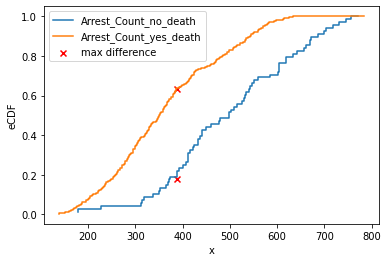

In [123]:
perform_2_pop_KS(arrest_count_no_death.loc[:,'Counts'].values,
                 arrest_count_yes_death.loc[:,'Counts'].values, 
                 "Arrest_Count_no_death", "Arrest_Count_yes_death")
print("\n")


The End
---



---



---



---

